# Lab 9: Overfitting, underfitting, fitting polynomials, k-fold cross validation

We will look at [Anscombe's quartet](https://en.wikipedia.org/wiki/Anscombe%27s_quartet), which are four constructed datasets that appear similar statistics, including regression lines, but look different when graphed.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.model_selection import KFold


%matplotlib inline

Load Anscombe's quartet in from Seaborn and look at it.  The four different datasets are indicated by the `dataset` column.

In [3]:
anscombe = sns.load_dataset("anscombe")
anscombe

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


To make things easier, create a new dataframe for each of the four datasets.

In [9]:
filter_1 = anscombe["dataset"] == "I"
anscombe_1  = anscombe[filter_1]
anscombe_1

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


In [10]:
filter_2 = anscombe["dataset"] == "II"
anscombe_2  = anscombe[filter_2]
anscombe_2

,dataset,x,y
11,II,10.0,9.14
12,II,8.0,8.14
13,II,13.0,8.74
14,II,9.0,8.77
15,II,11.0,9.26
16,II,14.0,8.10
17,II,6.0,6.13
18,II,4.0,3.10
19,II,12.0,9.13
20,II,7.0,7.26


In [11]:
filter_3 = anscombe["dataset"] == "III"
anscombe_3  = anscombe[filter_3]
anscombe_3

,dataset,x,y
22,III,10.0,7.46
23,III,8.0,6.77
24,III,13.0,12.74
25,III,9.0,7.11
26,III,11.0,7.81
27,III,14.0,8.84
28,III,6.0,6.08
29,III,4.0,5.39
30,III,12.0,8.15
31,III,7.0,6.42


In [12]:
filter_4 = anscombe["dataset"] == "IV"
anscombe_4  = anscombe[filter_4]
anscombe_4

,dataset,x,y
33,IV,8.0,6.58
34,IV,8.0,5.76
35,IV,8.0,7.71
36,IV,8.0,8.84
37,IV,8.0,8.47
38,IV,8.0,7.04
39,IV,8.0,5.25
40,IV,19.0,12.50
41,IV,8.0,5.56
42,IV,8.0,7.91


### Plot of data
Plot each of the data sets with a regression line using Seaborn.  Which regression lines fit the data?

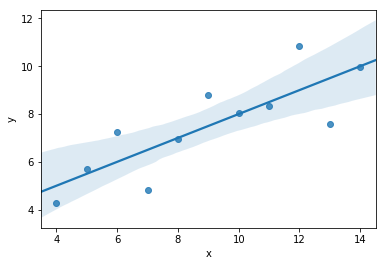

In [13]:
sns.regplot(x = "x", y = "y", data = anscombe_1)

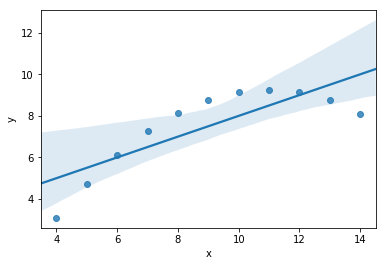

In [15]:
sns.regplot(x = "x", y = "y", data = anscombe_2)

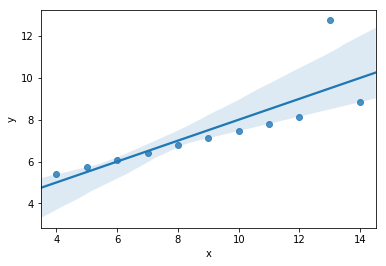

In [16]:
sns.regplot(x = "x", y = "y", data = anscombe_3)

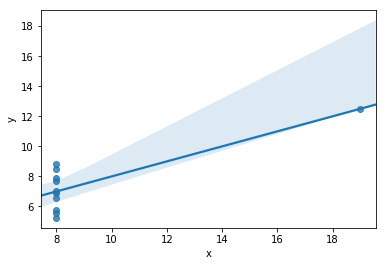

In [17]:
sns.regplot(x = "x", y = "y", data = anscombe_4)

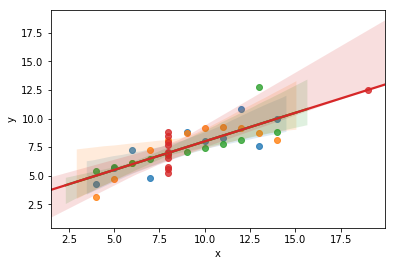

In [23]:
sns.regplot(x = "x", y = "y", data = anscombe_1)
sns.regplot(x = "x", y = "y", data = anscombe_2)
sns.regplot(x = "x", y = "y", data = anscombe_3)
sns.regplot(x = "x", y = "y", data = anscombe_4)

## R-Squared

Compute R-Squared for each regression (you will have to compute the linear model using statsmodel).  What do you notice about the R-Squared values?  How do they compare to your visual assessment of the fit in the previous section?

In [19]:
lm = smf.ols("y ~ x",data = anscombe_1).fit()
lm.rsquared

0.666542459508775

In [24]:
lm2 = smf.ols("y ~ x",data = anscombe_2).fit()
lm2.rsquared

0.6662420337274843

In [25]:
lm3 = smf.ols("y ~ x",data = anscombe_3).fit()
lm3.rsquared

0.6663240410665592

In [26]:
lm4 = smf.ols("y ~ x",data = anscombe_4).fit()
lm4.rsquared

0.6667072568984653

## Overfitting and Underfitting models

Overfitting and underfitting refer to the complexity of the model relative to the data.  

First plot Anscombe's second quartet and the regression line again:

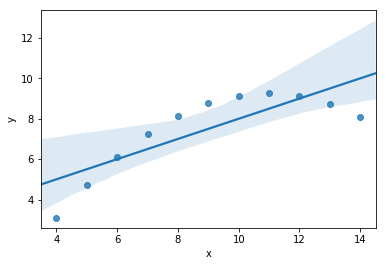

In [27]:
sns.regplot(x = "x", y = "y", data = anscombe_2)

The above data set and linear model is an example of *underfitting* because the model is too simple compared to the data.  The linear model is not capturing the curve of the data.

We can increase the order of a model to increase it's complexity.  Add the parameter `order = 2` to your plot:

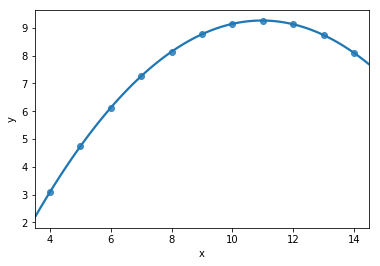

In [28]:
sns.regplot(x = "x", y = "y", data = anscombe_2, order = 2)

What happened?

What happens if we increase the order to 3?

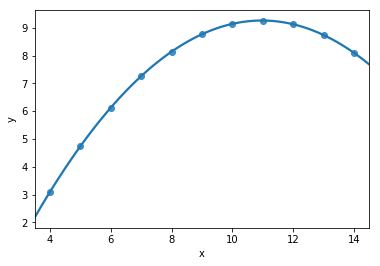

In [29]:
sns.regplot(x = "x", y = "y", data = anscombe_2, order = 3)

## Overfitting

Use Seaborn to plot Anscombe's first dataset with the regression line.

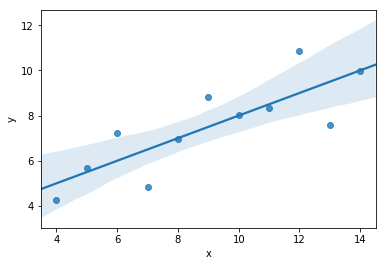

In [30]:
sns.regplot(x = "x", y = "y", data = anscombe_1)

What happens if you add the parameter `order = 2`?

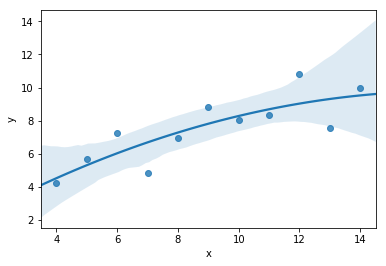

In [31]:
sns.regplot(x = "x", y = "y", data = anscombe_1, order = 2)

What happens if you use `order = 3`?

/home/megan.owen/.local/lib/python3.4/site-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)


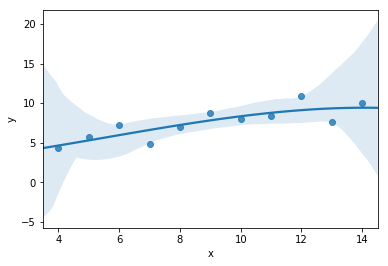

In [32]:
sns.regplot(x = "x", y = "y", data = anscombe_1, order = 3)

This is an example of overfitting, because the equations for the lines are more complex than they need to be.

## k-fold cross validation

We will use k = 2, because our datasets are so small.  We will also do the computations manually.

Use `test_train_split()` from the last lab to split the third Anscombe data in half.

In [33]:
X_train, X_test, y_train, y_test = train_test_split(anscombe_3[["x"]], \
                                                    anscombe_3["y"], test_size=0.5)

In [34]:
X_train

,x
31,7.0
23,8.0
29,4.0
22,10.0
26,11.0


In [35]:
y_train

31    6.42
23    6.77
29    5.39
22    7.46
26    7.81
Name: y, dtype: float64

Find the linear model for the training data:

Compute the mean squared error for the training data predictions:

Now compute the linear model for the test data:

Compute the mean squared error for the test data:

How do the two mean squared errors differ?  Does this make sense?  (You may need to plot the test and training data to answer this question.)